# Nick Juliano
# Computational Physics | Homework 10

## Problem:

"Merging compact objects produces a chirp signal in the gravitational wave detector.
Assume the chirp signal is 
\begin{equation}
y(t)=\begin{cases} sin(t^2) \quad 0<t<15 \\
0 \quad else\\
\end{cases}
\end{equation}

Please do wavelet transform to show the chirp signal is similar to the one you have seen
online. (Notice that the figure online has time as x-axis and frequency as the y-axis)
(You are welcome to use any wavelet you prefer.)"


## Solution:

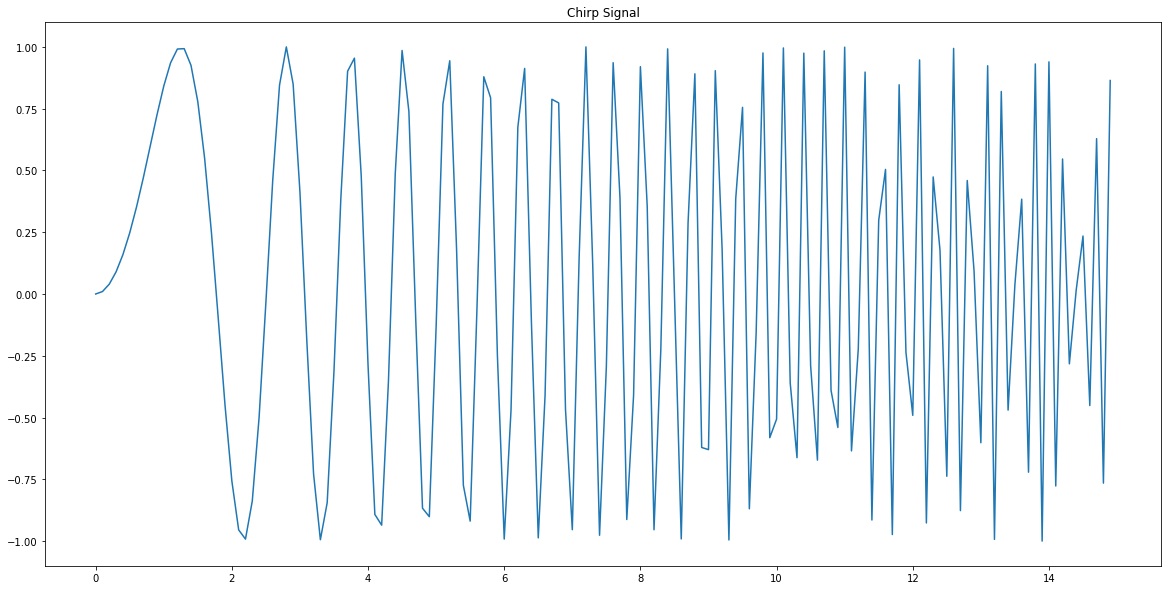

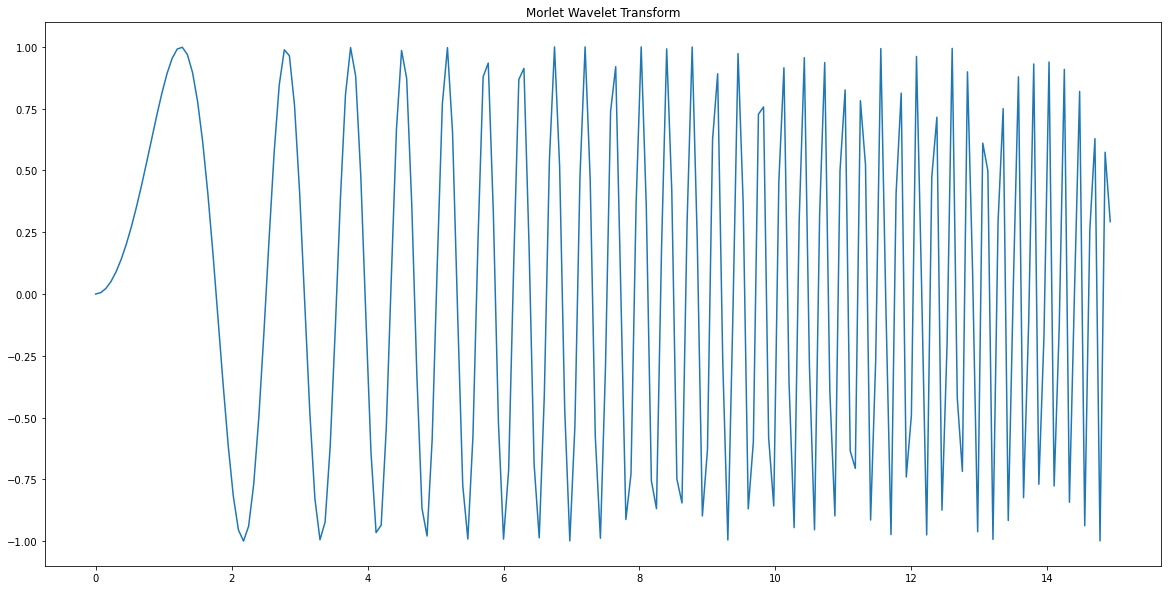

In [1]:
#Code adapted from that given in Lect20

import matplotlib.pyplot as plt
from numpy import *

def func(t):
    if(0<=t and t<=15):
        y=sin(t**2)
    else:
        y=0
    return y
        
t=arange(0,15,0.1)
y=zeros(len(t))
for idx in range(len(t)):
    y[idx]=func(t[idx])

plt.figure(figsize=[20, 10])
plt.plot(t,y)
plt.title('Chirp Signal')
plt.show()

ns=50
ntau=200
dstep=2./ns
sar=arange(0.001,2.001,dstep)
dtaustep=15./ntau
tauar=arange(0.,15.,dtaustep)
ystau=zeros((ns, ntau),complex)

nt=200
dtstep=15./nt
tar=arange(0.,15.,dtstep)

    
# Morlet wavelet
def morlet(t,sigma):
    psi=exp(2.*pi*t*1j)*exp(-t*t/2./sigma/sigma)
    return psi

yarr=zeros(nt)
def wavelet():     
    for idext in range(nt):
        yarr[idext]=func(tar[idext])
    for idexs in range(ns):
        for idextau in range(ntau):
            for idext in range(nt):  
                ystau[idexs,idextau] = sum(conj(morlet(((tar-tauar[idextau])/sar[idexs]), 1.))*yarr)*dtstep/sqrt(sar[idexs])
                
wavelet()

plt.figure(figsize=[20, 10])
plt.plot(tar,yarr)
plt.title('Morlet Wavelet Transform')
plt.show()